# Explore the win percentages of each box at each track-distance

----

In [1]:
import os
import decouple
config = decouple.AutoConfig(' ')
os.chdir(config('ROOT_DIRECTORY'))
import sys
sys.path.insert(0, '')

from loaders.local import DataHandler as dh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
box_win_proportion_column_names = [f"Box_{i}_WP" for i in range(1, 9)]
test_partition_first_day = '2021-01-01'

In [3]:
data = dh.get_train_data()
data = data.set_index(['RaceDate', 'FasttrackRaceId', 'FasttrackDogId', 'TrainerId'])
data

Place          DogName  \
RaceDate   FasttrackRaceId FasttrackDogId TrainerId                           
2018-07-01 335811282       157500927      7683           1      RAINE ALLEN   
                           1820620018     137227         2       SURF A LOT   
                           1950680026     132763         3      PINGIN' BEE   
                           1524380048     116605         4  LUCAS THE GREAT   
                           124225458      132763         5            QUAVO   
...                                                    ...              ...   
2021-11-30 734778635       614057722      69407          4   INFAMOUS ANGEL   
           734778636       576142623      130513         1   ROISIN MONELLI   
                           540582677      130351         2   RAPIDO CHA CHA   
                           580792922      102994         3  TIGGERLONG FOOT   
           734778637       504470931      92464          1      GLOBAL GAIN   

                                                     Box  Rug  Weight  \
RaceDate   FasttrackRaceId FasttrackDogId TrainerId                     
2018-07-01 335811282       157500927      7683         1    1    27.4   
                           1820620018     137227       2    2    32.8   
                           1950680026     132763       6    6    25.5   
                           1524380048     116605       7    7    32.2   
                           124225458      132763       4    4    28.9   
...                                                  ...  ...     ...   
2021-11-30 734778635       614057722      69407        3    3    25.0   
           734778636       576142623      130513       1    1    29.1   
                           540582677      130351       7    7    26.1   
                           580792922      102994       5    5    25.5   
           734778637       504470931      92464        1    1    32.3   

                                                     StartPrice  Margin1  \
RaceDate   FasttrackRaceId FasttrackDogId TrainerId                        
2018-07-01 335811282       157500927      7683              2.4     2.30   
                           1820620018     137227            6.3     2.30   
                           1950680026     132763            9.3     3.84   
                           1524380048     116605            9.1     5.27   
                           124225458      132763            3.4     5.56   
...                                                         ...      ...   
2021-11-30 734778635       614057722      69407             NaN    12.25   
           734778636       576142623      130513            NaN     1.00   
                           540582677      130351            NaN     1.00   
                           580792922      102994            NaN     6.00   
           734778637       504470931      92464             NaN      NaN   

                                                     Margin2    PIR  Checks  \
RaceDate   FasttrackRaceId FasttrackDogId TrainerId                           
2018-07-01 335811282       157500927      7683           NaN  Q/111       0   
                           1820620018     137227        2.30  M/332       0   
                           1950680026     132763        1.54  S/443       0   
                           1524380048     116605        1.43  M/655       5   
                           124225458      132763        0.29  M/766       8   
...                                                      ...    ...     ...   
2021-11-30 734778635       614057722      69407         0.14      2       0   
           734778636       576142623      130513         NaN     11       0   
                           540582677      130351        1.14     32       0   
                           580792922      102994        4.86     23       0   
           734778637       504470931      92464          NaN    111       0   

                                                     Split

In [4]:
def get_inferred_venue_features(data):
    box_win_proportion_column_names = [f"Box_{i}_WP" for i in range(1, 9)]

    iv_features = data[['Place', 'Box', 'TrackDist']].copy()
    iv_features = iv_features.set_index('TrackDist', append = True)
    iv_features.index = iv_features.index.droplevel(['FasttrackDogId', 'TrainerId'])
    iv_features['IsWinner'] = (iv_features.Place == 1).astype(int)
    iv_features = iv_features.drop(columns = ['Place'])
    iv_features = iv_features.reset_index().pivot(index = iv_features.index.names, columns = ['Box'], values = ['IsWinner']).fillna(0)
    iv_features.columns = box_win_proportion_column_names

    return iv_features

box_wins = get_inferred_venue_features(data)
box_wins

Box_1_WP  Box_2_WP  Box_3_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2018-07-01 334309830       Sale440              0.0       1.0       0.0   
           334309949       Albion Park331       0.0       0.0       0.0   
           334309950       Albion Park331       0.0       0.0       0.0   
           334309951       Albion Park331       0.0       0.0       1.0   
           334309952       Albion Park331       0.0       1.0       0.0   
...                                             ...       ...       ...   
2021-11-30 735164901       Warragul400          1.0       0.0       0.0   
           735164902       Warragul460          0.0       0.0       0.0   
           735164903       Warragul460          1.0       0.0       0.0   
           735164904       Warragul460          1.0       0.0       0.0   
           735164905       Warragul460          1.0       0.0       0.0   

                                           Box_4_WP  Box_5_WP  Box_6_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2018-07-01 334309830       Sale440              0.0       0.0       0.0   
           334309949       Albion Park331       1.0       0.0       0.0   
           334309950       Albion Park331       0.0       0.0       0.0   
           334309951       Albion Park331       0.0       0.0       0.0   
           334309952       Albion Park331       0.0       0.0       0.0   
...                                             ...       ...       ...   
2021-11-30 735164901       Warragul400          0.0       0.0       0.0   
           735164902       Warragul460          0.0       0.0       0.0   
           735164903       Warragul460          0.0       0.0       0.0   
           735164904       Warragul460          0.0       0.0       0.0   
           735164905       Warragul460          0.0       0.0       0.0   

                                           Box_7_WP  Box_8_WP  
RaceDate   FasttrackRaceId TrackDist                           
2018-07-01 334309830       Sale440              0.0       0.0  
           334309949       Albion Park331       0.0       0.0  
           334309950       Albion Park331       0.0       1.0  
           334309951       Albion Park331       0.0       0.0  
           334309952       Albion Park331       0.0       0.0  
...                                             ...       ...  
2021-11-30 735164901       Warragul400          0.0       0.0  
           735164902       Warragul460          0.0       1.0  
           735164903       Warragul460          0.0       0.0  
           735164904       Warragul460          0.0       0.0  
           735164905       Warragul460          0.0       0.0  

[106942 rows x 8 columns]

# Drop First N Cumulative

In [5]:
def get_firstN_cumulative(data, first_num_races_to_discard):

    iv_features = get_inferred_venue_features(data)

    ev_features = iv_features.copy()
    ev_features['RaceNumber'] = 1.0
    ev_features = ev_features.groupby(level = [2]).cumsum()
    ev_features[box_win_proportion_column_names] = ev_features[box_win_proportion_column_names].div(ev_features.RaceNumber.values, axis = 0)

    ev_features = ev_features[ev_features.RaceNumber > first_num_races_to_discard]
    ev_features = ev_features.drop(columns = ['RaceNumber'])

    return ev_features

fnc_features = get_firstN_cumulative(data, 100)
fnc_features

Box_1_WP  Box_2_WP  Box_3_WP  \
RaceDate   FasttrackRaceId TrackDist                                   
2018-08-03 346062842       Ipswich431   0.267327  0.188119  0.158416   
           346062844       Ipswich431   0.264706  0.186275  0.166667   
           346062846       Ipswich431   0.262136  0.184466  0.165049   
           346062848       Ipswich431   0.259615  0.182692  0.163462   
           346062850       Ipswich431   0.257143  0.180952  0.171429   
...                                          ...       ...       ...   
2021-11-30 735164901       Warragul400  0.157564  0.136221  0.131513   
           735164902       Warragul460  0.178199  0.149289  0.112796   
           735164903       Warragul460  0.178588  0.149218  0.112743   
           735164904       Warragul460  0.178977  0.149148  0.112689   
           735164905       Warragul460  0.179366  0.149077  0.112636   

                                        Box_4_WP  Box_5_WP  Box_6_WP  \
RaceDate   FasttrackRaceId TrackDist                                   
2018-08-03 346062842       Ipswich431   0.089109  0.069307  0.089109   
           346062844       Ipswich431   0.088235  0.068627  0.088235   
           346062846       Ipswich431   0.087379  0.067961  0.087379   
           346062848       Ipswich431   0.086538  0.067308  0.086538   
           346062850       Ipswich431   0.085714  0.066667  0.085714   
...                                          ...       ...       ...   
2021-11-30 735164901       Warragul400  0.107659  0.094476  0.110169   
           735164902       Warragul460  0.107109  0.097156  0.112796   
           735164903       Warragul460  0.107058  0.097110  0.112743   
           735164904       Warragul460  0.107008  0.097064  0.112689   
           735164905       Warragul460  0.106957  0.097018  0.112636   

                                        Box_7_WP  Box_8_WP  
RaceDate   FasttrackRaceId TrackDist                        
2018-08-03 346062842       Ipswich431   0.089109  0.049505  
           346062844       Ipswich431   0.088235  0.049020  
           346062846       Ipswich431   0.087379  0.058252  
           346062848       Ipswich431   0.096154  0.057692  
           346062850       Ipswich431   0.095238  0.057143  
...                                          ...       ...  
2021-11-30 735164901       Warragul400  0.116447  0.147834  
           735164902       Warragul460  0.118957  0.125592  
           735164903       Warragul460  0.118901  0.125533  
           735164904       Warragul460  0.118845  0.125473  
           735164905       Warragul460  0.118788  0.125414  

[96729 rows x 8 columns]

In [6]:
first_num_races_to_discard = 100

before = box_wins.copy()
after = fnc_features.copy()

before_index = before.reset_index()[before.index.names]
after_index = after.reset_index()[after.index.names]
outer_join = before_index.merge(after_index, how = 'outer', indicator = True)
dropped_index = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)


n_races_dropped = len(before) - len(after)
print(f"Number of races dropped: {n_races_dropped}")

p_races_dropped = n_races_dropped * 100/ len(before)
print(f"Percent of races dropped: {p_races_dropped:.02f}%")

fully_dropped_venues = before.groupby(['TrackDist']).filter(lambda t: len(t) <= first_num_races_to_discard).reset_index()['TrackDist'].unique()
print(f"Number of fully dropped venues: {len(fully_dropped_venues)}")

kept_races_earliest_date = after_index.RaceDate.min()
print(f"Kept races earliest date: {kept_races_earliest_date} vs overall available data earliest date: {before_index.RaceDate.min()}")


Number of races dropped: 10213
Percent of races dropped: 9.55%
Number of fully dropped venues: 40
Kept races earliest date: 2018-08-03 vs overall available data earliest date: 2018-07-01


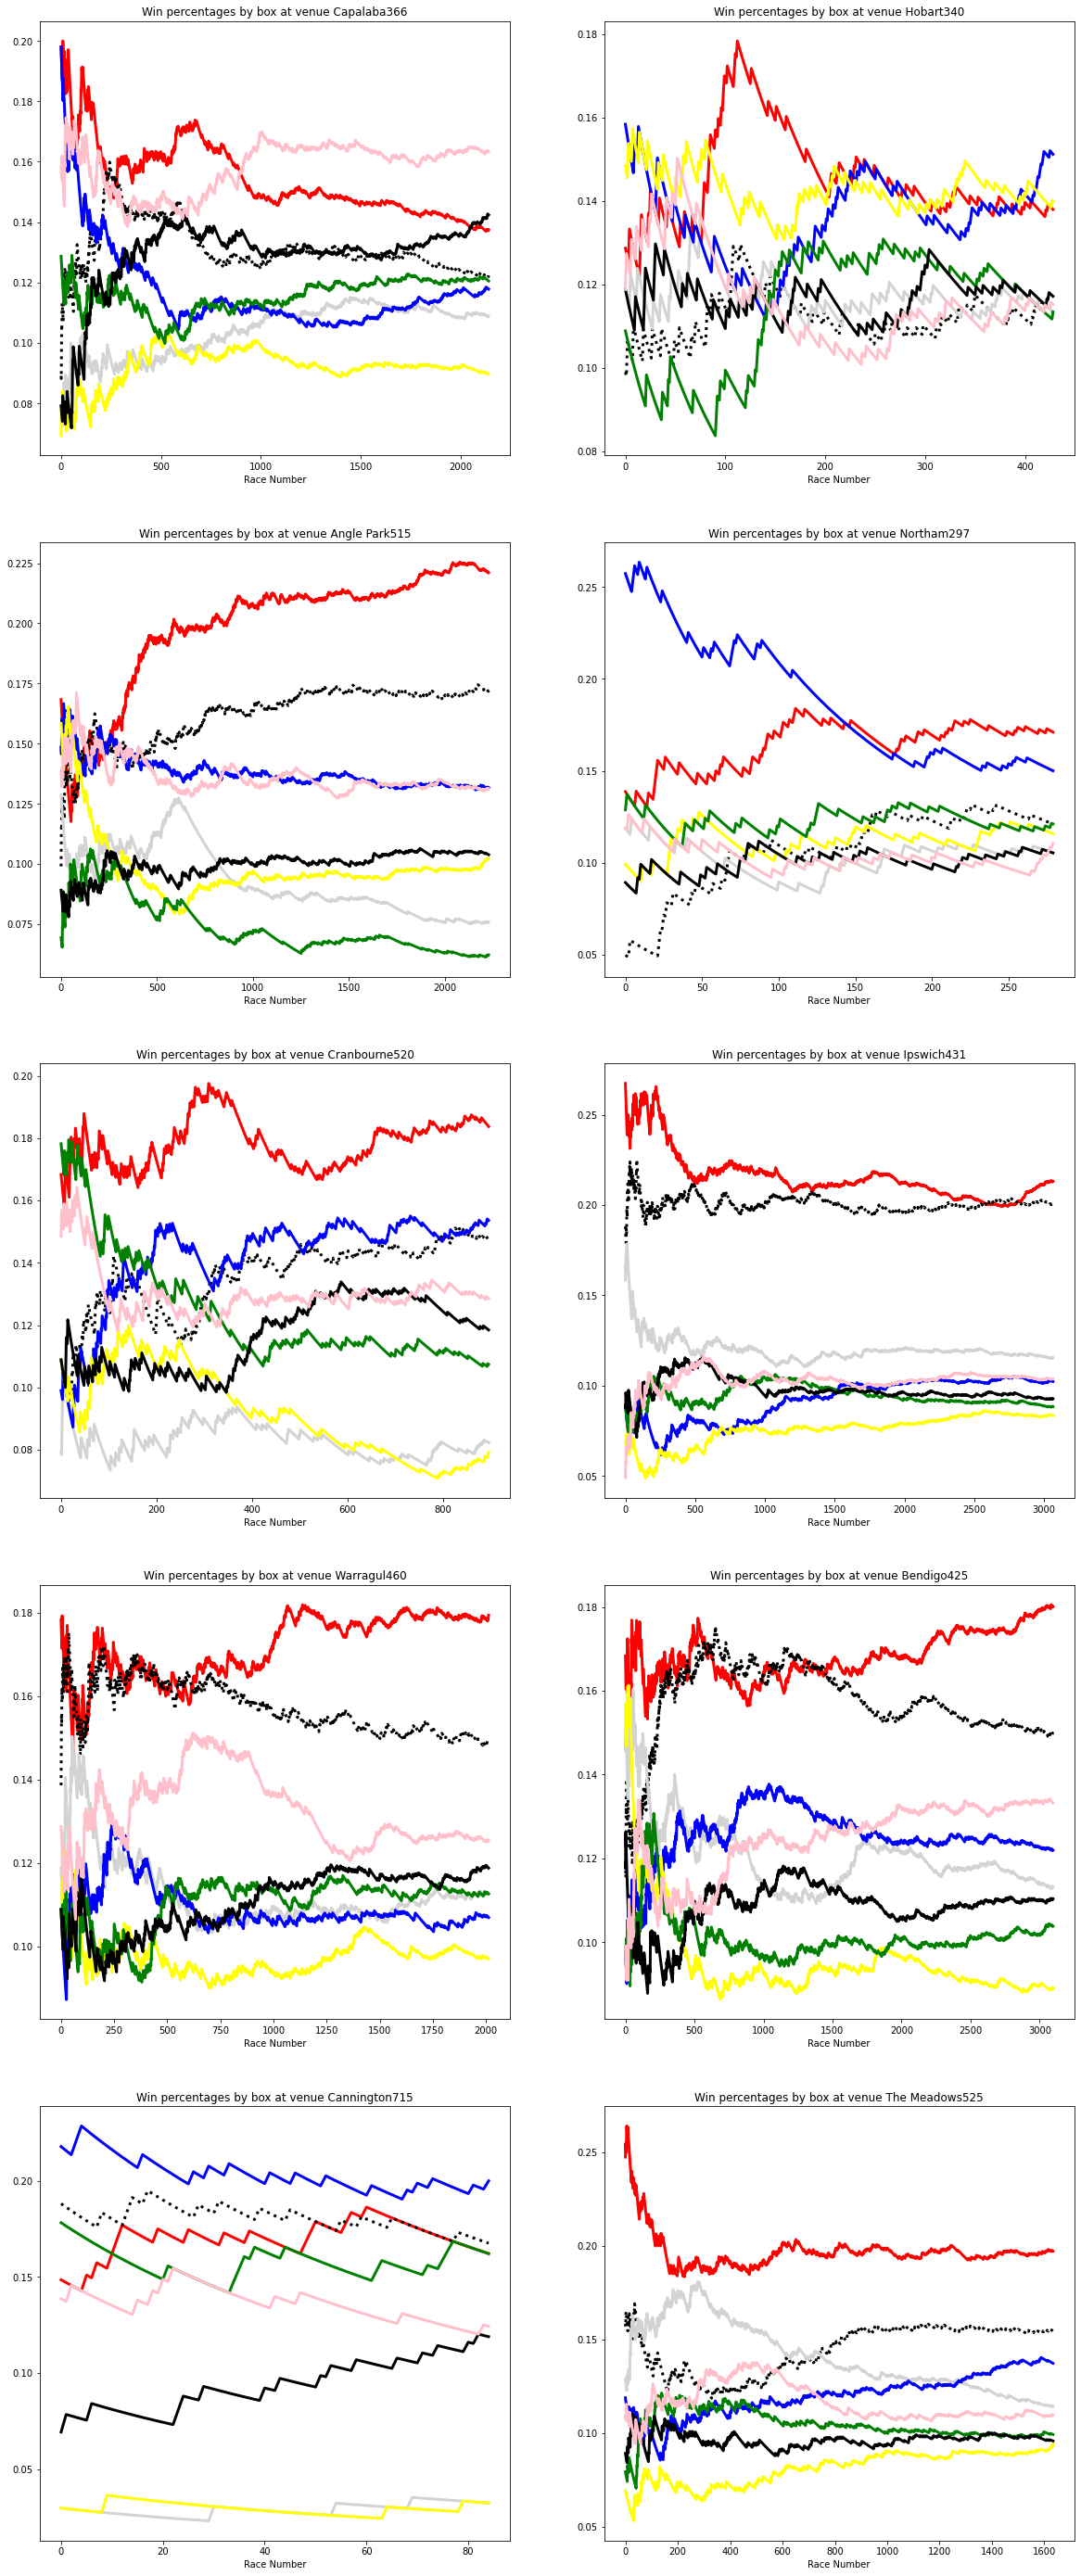

In [7]:
def plot_box_win_percentages(box_wp_data, n_rows = 5, n_cols = 2):

    random_venues = box_wp_data.reset_index()[['TrackDist']].drop_duplicates().sample(n_rows * n_cols)['TrackDist'].to_numpy()

    colors = ['red', 'black', 'lightgray', 'blue', 'yellow', 'green', 'black', 'pink']
    linestyles = ['solid' for _ in range(8)]
    linestyles[1] = 'dotted'

    fig, ax = plt.subplots(n_rows, n_cols)
    fig.set_figheight(n_rows * 10)
    fig.set_figwidth(n_cols * 10)

    for i in range(n_rows):
        for j in range(n_cols):
            venue = random_venues[i * n_cols + j]
            ax[i, j].set_prop_cycle(color = colors, linestyle = linestyles)
            ax[i, j].plot(box_wp_data[box_wp_data.index.get_level_values('TrackDist') == venue].reset_index(drop = True), linewidth = 3)
            ax[i, j].title.set_text(f"Win percentages by box at venue {venue}")
            ax[i, j].set_xlabel("Race Number")

    plt.show()

plot_box_win_percentages(fnc_features)

# N+1 Rolling Window

I don't like this method:
- there seem to be too much variance (noise) that makes boxes less distinguishable
- taking larger window size would help to reduce the variance but on the other hand would also reduce the training set size

In [8]:
def get_rolling_window(data, roll_window_size):

    iv_features = get_inferred_venue_features(data)

    ev_features = iv_features.copy()
    ev_features = ev_features.groupby(level = [2]).rolling(window = roll_window_size, closed = 'left').mean().reset_index(level = 0, drop = True)
    ev_features = ev_features[~ev_features.isna().any(axis = 1)]
    ev_features

    return ev_features

rw_features = get_rolling_window(data, 500)
rw_features

Box_1_WP  Box_2_WP  Box_3_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2019-04-14 425590533       Albion Park331     0.204     0.148     0.134   
           425590534       Albion Park331     0.204     0.148     0.134   
           425590535       Albion Park331     0.206     0.148     0.134   
           425590537       Albion Park331     0.206     0.150     0.132   
           425590538       Albion Park331     0.208     0.148     0.132   
...                                             ...       ...       ...   
2021-11-25 733774631       Warrnambool450     0.226     0.120     0.086   
2021-11-29 734659906       Warrnambool450     0.226     0.122     0.086   
           734659907       Warrnambool450     0.226     0.122     0.086   
           734659908       Warrnambool450     0.228     0.122     0.086   
           734659909       Warrnambool450     0.226     0.122     0.086   

                                           Box_4_WP  Box_5_WP  Box_6_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2019-04-14 425590533       Albion Park331     0.116     0.114     0.088   
           425590534       Albion Park331     0.116     0.114     0.088   
           425590535       Albion Park331     0.116     0.114     0.088   
           425590537       Albion Park331     0.116     0.114     0.088   
           425590538       Albion Park331     0.116     0.114     0.088   
...                                             ...       ...       ...   
2021-11-25 733774631       Warrnambool450     0.108     0.106     0.108   
2021-11-29 734659906       Warrnambool450     0.108     0.104     0.108   
           734659907       Warrnambool450     0.108     0.104     0.108   
           734659908       Warrnambool450     0.108     0.104     0.106   
           734659909       Warrnambool450     0.108     0.104     0.108   

                                           Box_7_WP  Box_8_WP  
RaceDate   FasttrackRaceId TrackDist                           
2019-04-14 425590533       Albion Park331     0.090     0.106  
           425590534       Albion Park331     0.090     0.106  
           425590535       Albion Park331     0.090     0.104  
           425590537       Albion Park331     0.090     0.104  
           425590538       Albion Park331     0.090     0.104  
...                                             ...       ...  
2021-11-25 733774631       Warrnambool450     0.132     0.116  
2021-11-29 734659906       Warrnambool450     0.132     0.116  
           734659907       Warrnambool450     0.132     0.116  
           734659908       Warrnambool450     0.132     0.116  
           734659909       Warrnambool450     0.132     0.116  

[69612 rows x 8 columns]

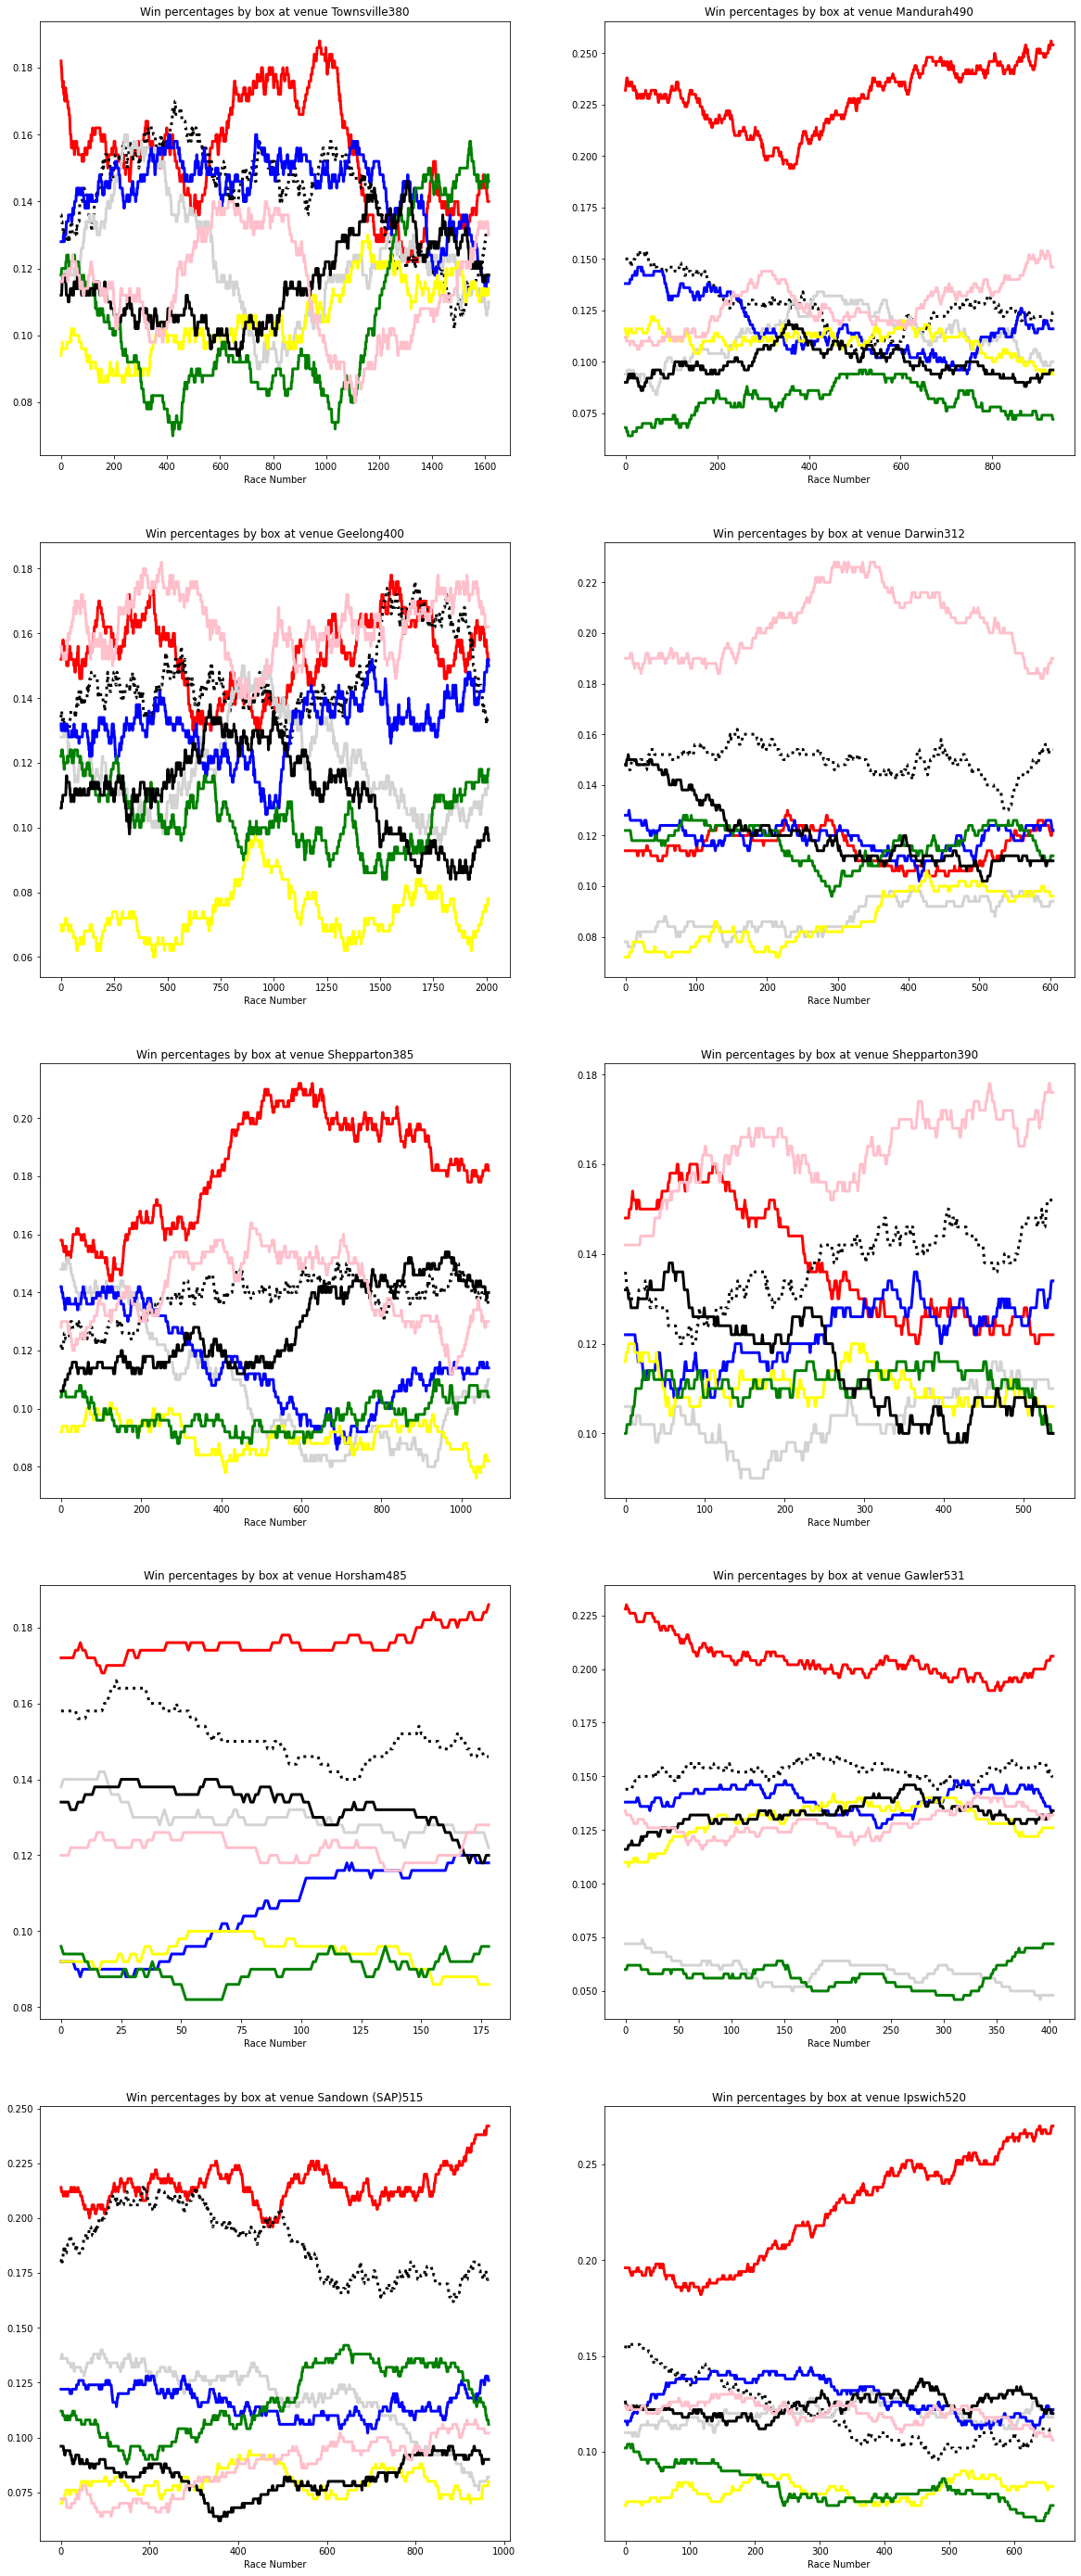

In [9]:
plot_box_win_percentages(rw_features)

# All Train then Cumulative

Why is it ok to look at future races to estimate the box win percentages?
- The box win percentages are assumed to be constant and independent of the number of races. Using the whole training set gives a better estimate.
- Win percentages near 0 and 1 that could negatively affect the predictions are avoided due to large number of races.
- The estimates are updated cumulatively on the test dataset to properly simulate unseen data.

In [10]:
def get_all_train_cumulative(data):

    iv_features = get_inferred_venue_features(data)

    ev_train_features = iv_features[iv_features.index.get_level_values('RaceDate') < test_partition_first_day].copy()
    ev_train_features = ev_train_features.groupby(ev_train_features.index.get_level_values('TrackDist')).transform(lambda t: t.mean())
    ev_train_features

    ev_test_features = iv_features.copy()
    ev_test_features['RaceNumber'] = 1.0
    ev_test_features = ev_test_features.groupby(level = [2]).cumsum()
    ev_test_features[box_win_proportion_column_names] = ev_test_features[box_win_proportion_column_names].div(ev_test_features.RaceNumber.values, axis = 0)
    ev_test_features = ev_test_features.drop('RaceNumber', axis = 1)
    ev_test_features = ev_test_features[ev_test_features.index.get_level_values('RaceDate') >= test_partition_first_day]

    ev_features = pd.concat([ev_train_features, ev_test_features])
    return ev_features

atc_features = get_all_train_cumulative(data)
atc_features

Box_1_WP  Box_2_WP  Box_3_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2018-07-01 334309830       Sale440         0.150984  0.125465  0.121212   
           334309949       Albion Park331  0.187113  0.149318  0.127633   
           334309950       Albion Park331  0.187113  0.149318  0.127633   
           334309951       Albion Park331  0.187113  0.149318  0.127633   
           334309952       Albion Park331  0.187113  0.149318  0.127633   
...                                             ...       ...       ...   
2021-11-30 735164901       Warragul400     0.157564  0.136221  0.131513   
           735164902       Warragul460     0.178199  0.149289  0.112796   
           735164903       Warragul460     0.178588  0.149218  0.112743   
           735164904       Warragul460     0.178977  0.149148  0.112689   
           735164905       Warragul460     0.179366  0.149077  0.112636   

                                           Box_4_WP  Box_5_WP  Box_6_WP  \
RaceDate   FasttrackRaceId TrackDist                                      
2018-07-01 334309830       Sale440         0.117491  0.096225  0.112174   
           334309949       Albion Park331  0.131351  0.100372  0.097893   
           334309950       Albion Park331  0.131351  0.100372  0.097893   
           334309951       Albion Park331  0.131351  0.100372  0.097893   
           334309952       Albion Park331  0.131351  0.100372  0.097893   
...                                             ...       ...       ...   
2021-11-30 735164901       Warragul400     0.107659  0.094476  0.110169   
           735164902       Warragul460     0.107109  0.097156  0.112796   
           735164903       Warragul460     0.107058  0.097110  0.112743   
           735164904       Warragul460     0.107008  0.097064  0.112689   
           735164905       Warragul460     0.106957  0.097018  0.112636   

                                           Box_7_WP  Box_8_WP  
RaceDate   FasttrackRaceId TrackDist                           
2018-07-01 334309830       Sale440         0.120680  0.158426  
           334309949       Albion Park331  0.097274  0.109665  
           334309950       Albion Park331  0.097274  0.109665  
           334309951       Albion Park331  0.097274  0.109665  
           334309952       Albion Park331  0.097274  0.109665  
...                                             ...       ...  
2021-11-30 735164901       Warragul400     0.116447  0.147834  
           735164902       Warragul460     0.118957  0.125592  
           735164903       Warragul460     0.118901  0.125533  
           735164904       Warragul460     0.118845  0.125473  
           735164905       Warragul460     0.118788  0.125414  

[106942 rows x 8 columns]

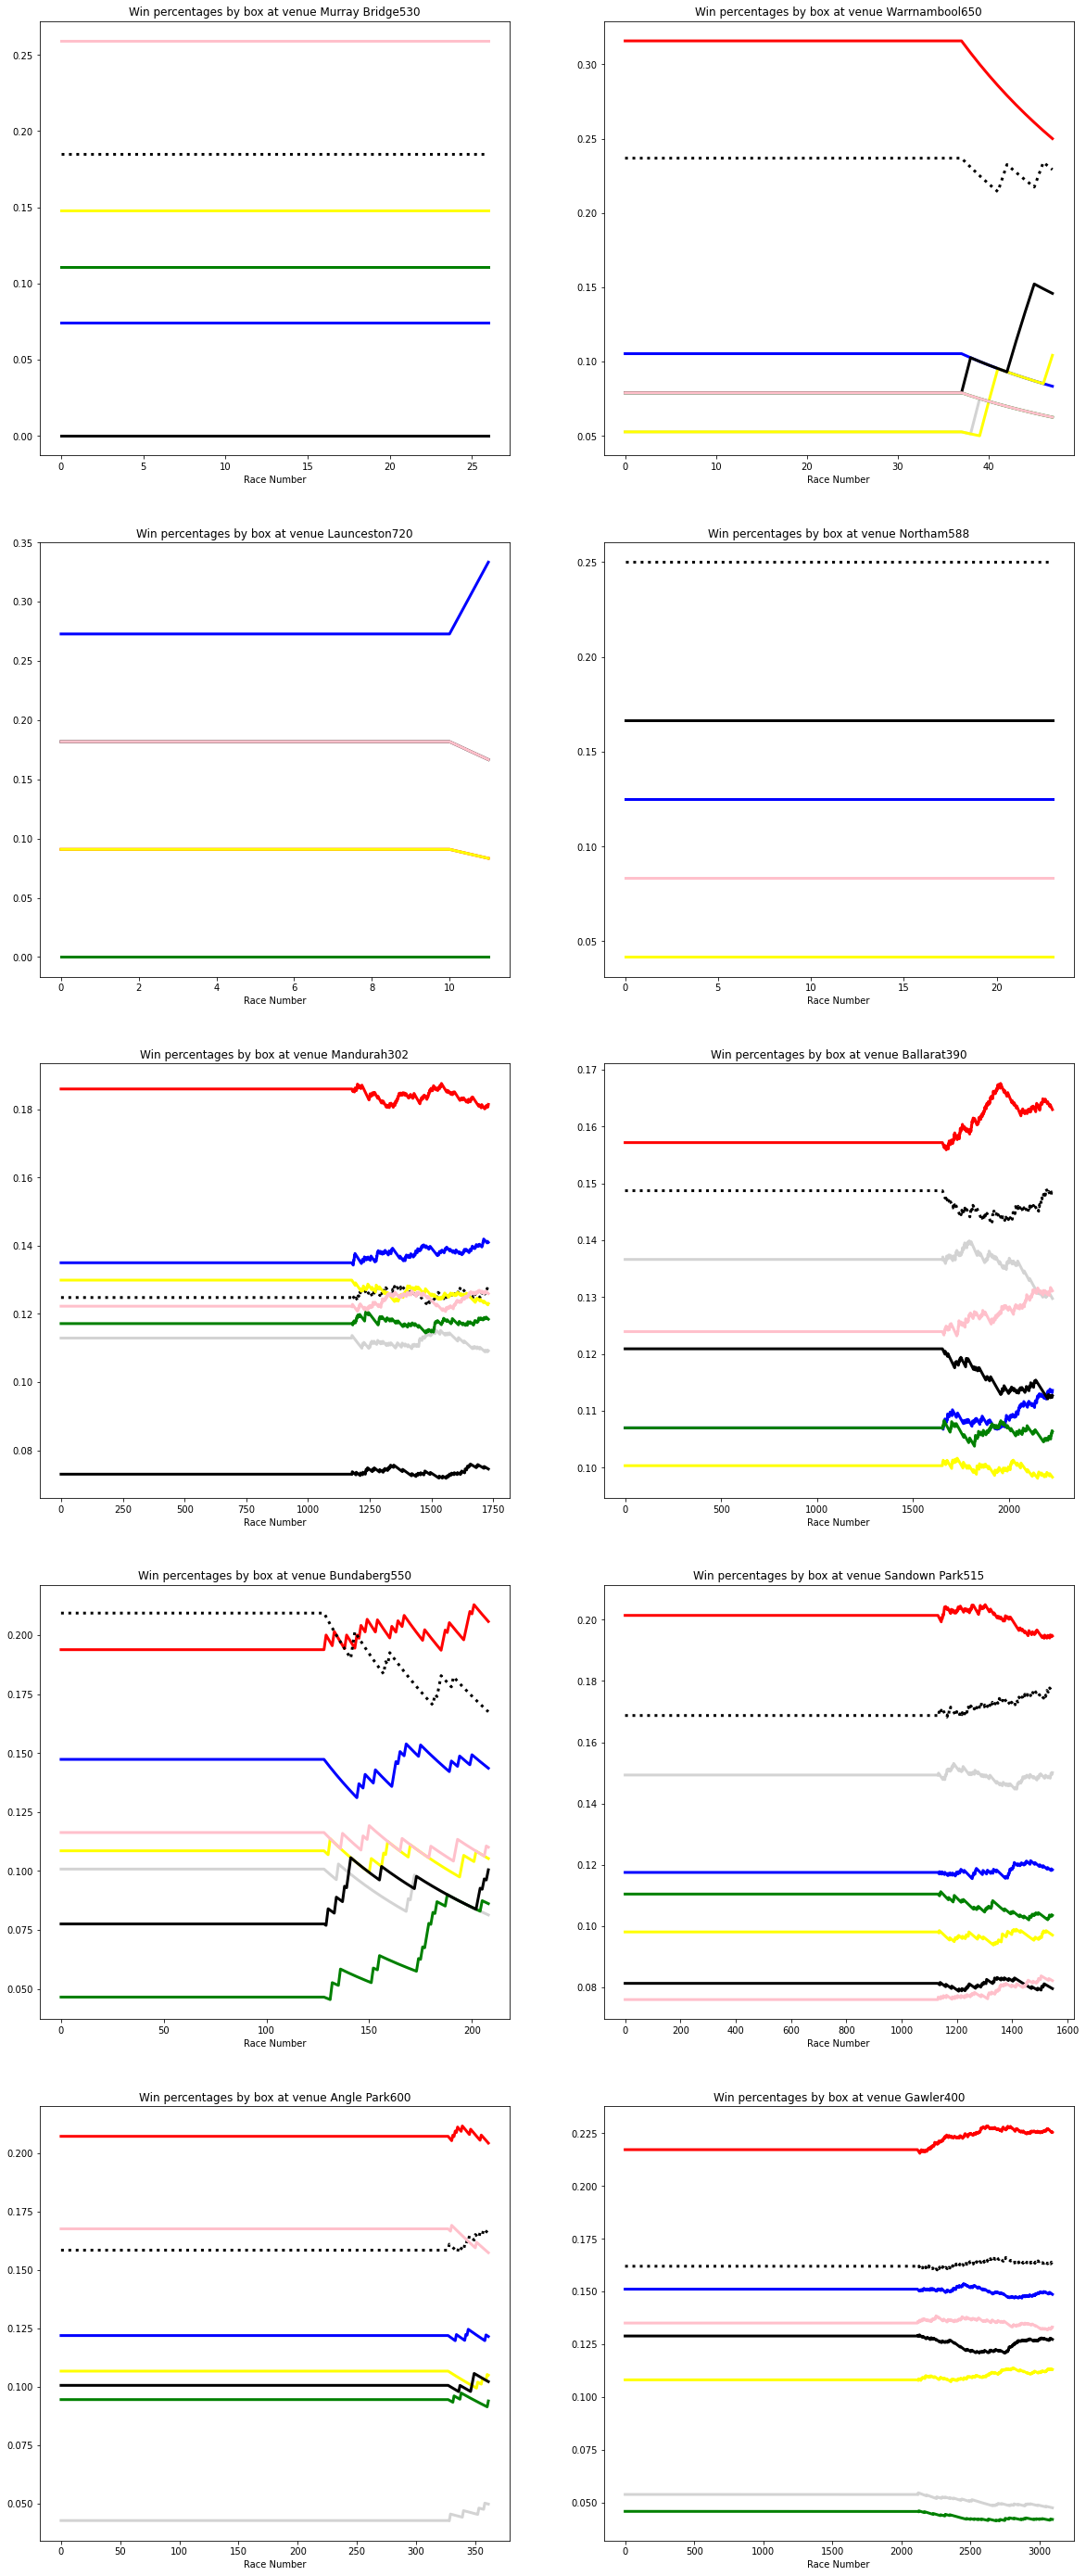

In [11]:
plot_box_win_percentages(atc_features)